**Importing Required Libraries**

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, PolynomialFeatures
from sklearn.metrics import r2_score

In [27]:
data=pd.read_csv("insurance.csv")

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [29]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [30]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [31]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


<ipython-input-32-57f5fa0f064b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


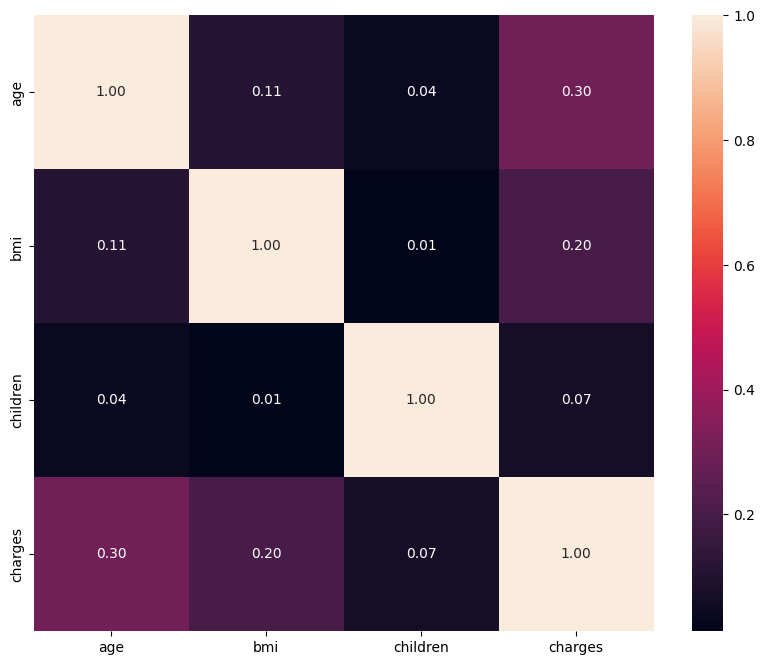

In [32]:
corr = data.corr()
fig, ax = plt.subplots(figsize = (10,8))
ax = sns.heatmap(corr, annot=True, fmt=".2f")

**Perform An Exploratory Data Analysis**

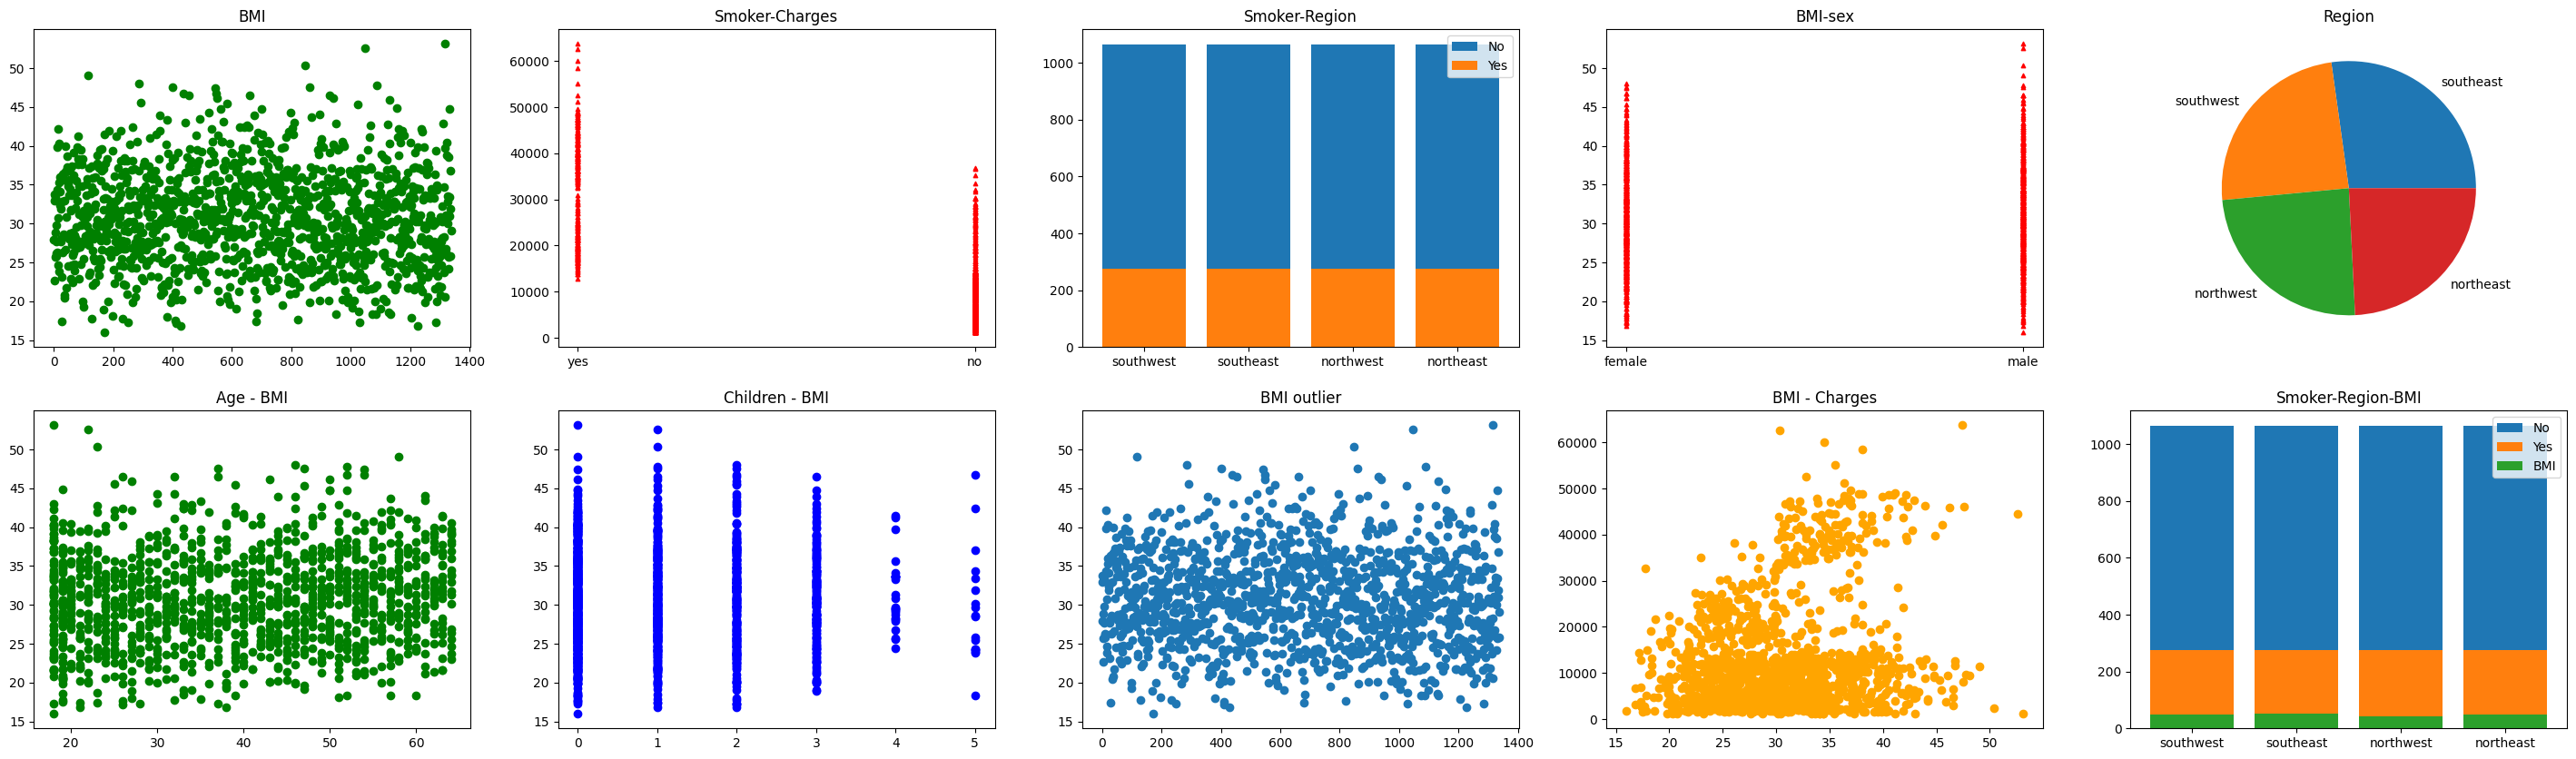

In [33]:

fig = plt.figure(figsize = (36,10))

# Examining the status of BMI data
f1 = fig.add_subplot(2, 5, 1)
f1.scatter(range(0, len(data["bmi"])), data["bmi"], color="green")
f1.set_title("BMI")

# Examining the relationship between Smoker and charges
f2 = fig.add_subplot(2, 5, 2)
f2.scatter(data["smoker"], data["charges"], marker="^", s = 10, color="red")
f2.set_title("Smoker-Charges")

# Examining the relationship between Smoker and region
classes3 =  data["smoker"].value_counts()
f3 = fig.add_subplot(2, 5, 3)
f3.bar(data["region"], classes3["no"], label = "No")
f3.bar(data["region"], classes3["yes"], label = "Yes")
f3.legend()
f3.set_title("Smoker-Region")

# Examining the relationship between BMI and sex
f4 = fig.add_subplot(2, 5, 4)
f4.scatter(data["sex"], data["bmi"], marker="^", s = 10, color="red")
f4.set_title("BMI-sex")

# Region distribution
f5 = fig.add_subplot(2, 5, 5)
regions = data["region"].value_counts()
f5.pie(regions, labels = regions.index)
f5.set_title("Region")

# Examining the relationship between Age and BMI
f6 = fig.add_subplot(2, 5, 6)
f6.scatter(data["age"], data["bmi"], color="green")
f6.set_title("Age - BMI")

# Examining the relationship between BMI and Children
f7 = fig.add_subplot(2, 5, 7)
f7.scatter(data["children"], data["bmi"], color="blue")
f7.set_title("Children - BMI")

# Does the BMI variable have an outlier?
f8 = fig.add_subplot(2, 5, 8)
f8.scatter(range(0, len(data["bmi"])), data["bmi"])
f8.set_title("BMI outlier")

# Examining the relationship between BMI and charges
f9 = fig.add_subplot(2, 5, 9)
f9.scatter(data["bmi"], data["charges"], color="orange")
f9.set_title("BMI - Charges")

# Examine the relationship between “region”, “smoker” and “bmi” using bar plot.
f10 = fig.add_subplot(2, 5, 10)
f10.bar(data["region"], classes3["no"], label = "No")
f10.bar(data["region"], classes3["yes"], label = "Yes")
f10.bar(data["region"], data["bmi"], label = "BMI")
f10.legend()
f10.set_title("Smoker-Region-BMI")

fig.show()

**Data Preprocessing**

In [34]:
ohe = OneHotEncoder()
tf_sex = ohe.fit_transform(data[["sex"]])
tf_sex = tf_sex.toarray()

tf_smoker = ohe.fit_transform(data[["smoker"]])
tf_smoker = tf_smoker.toarray()

tf_region = ohe.fit_transform(data[["region"]])
tf_region = tf_region.toarray()

print("sex")
print(data["sex"], tf_sex)
print("\nsmoker")
print(data["smoker"], tf_smoker)
print("\nregion")
print(data["region"], tf_smoker)

sex
0       female
1         male
2         male
3         male
4         male
         ...  
1333      male
1334    female
1335    female
1336    female
1337    female
Name: sex, Length: 1338, dtype: object [[1. 0.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]

smoker
0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object [[0. 1.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [0. 1.]]

region
0       southwest
1       southeast
2       southeast
3       northwest
4       northwest
          ...    
1333    northwest
1334    northeast
1335    southeast
1336    southwest
1337    northwest
Name: region, Length: 1338, dtype: object [[0. 1.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [0. 1.]]


In [35]:
data["sex"] = tf_sex
data["smoker"] = tf_smoker
data["region"] = tf_region

In [36]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1.0,27.900,0,0.0,0.0,16884.92400
1,18,0.0,33.770,1,1.0,0.0,1725.55230
2,28,0.0,33.000,3,1.0,0.0,4449.46200
3,33,0.0,22.705,0,1.0,0.0,21984.47061
4,32,0.0,28.880,0,1.0,0.0,3866.85520


In [37]:

X = data.drop("charges", axis=1)
y = data["charges"]

print(" X ")
print(X.head())
print(" ")
print(" y ")
print(y.head())

 X 
   age  sex     bmi  children  smoker  region
0   19  1.0  27.900         0     0.0     0.0
1   18  0.0  33.770         1     1.0     0.0
2   28  0.0  33.000         3     1.0     0.0
3   33  0.0  22.705         0     1.0     0.0
4   32  0.0  28.880         0     1.0     0.0
 
 y 
0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [39]:
sc = MinMaxScaler(feature_range=(0, 1))
X_train["age"] = sc.fit_transform(X_train[["age"]])
X_train["bmi"] = sc.fit_transform(X_train[["bmi"]])
X_train["children"] = sc.fit_transform(X_train[["children"]])

In [40]:
X_train.head()

,age,sex,bmi,children,smoker,region
560,0.608696,1.0,0.107345,0.4,1.0,0.0
1285,0.630435,1.0,0.224913,0.0,1.0,1.0
1142,0.739130,1.0,0.239440,0.0,1.0,0.0
969,0.456522,1.0,0.493947,1.0,1.0,0.0
486,0.782609,1.0,0.148238,0.6,1.0,0.0


In [41]:

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

**Model Selection**


In [42]:
ml = LinearRegression()
ml.fit(X_train, y_train)

LinearRegression()

In [43]:
print("Coefficients values: ",ml.coef_)
print("Intercept value: ", ml.intercept_)

Coefficients values:  [[ 1.18259250e+04  1.17042409e+01  1.24200862e+04  2.14253369e+03
  -2.36472089e+04  6.10144664e+02]]
Intercept value:  [21129.54284269]


**Model Score**

In [46]:

ml.score(X_test, y_test)

-4698.774635973826

In [48]:
ml.score(X_train, y_train)

0.7415607314140846